## Morphology locations as a Form

This is probably not very useful. Morphology locations are a rather abstract concept.
The form simply plots the generate locations on the morphology and writes them to a csv file.

In [1]:
import obi_one as obi
from pathlib import Path

morph_path = Path("example_data/morphologies/L5_TPC:A_MusMusculus_PrimarySomatosensory_C060114A5/C060114A5.swc")

output/initialize.center_pd_mean=20.0/initialize.max_dist_from_center=10.0/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=20.0/initialize.max_dist_from_center=None/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=50.0/initialize.max_dist_from_center=10.0/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=50.0/initialize.max_dist_from_center=None/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=100.0/initialize.max_dist_from_center=10.0/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=100.0/initialize.max_dist_from_center=None/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=500.0/initialize.max_dist_from_center=10.0/initialize.lst_section_types=[3, 4]/
output/initialize.center_pd_mean=500.0/initialize.max_dist_from_center=None/initialize.lst_section_types=[3, 4]/


{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None}

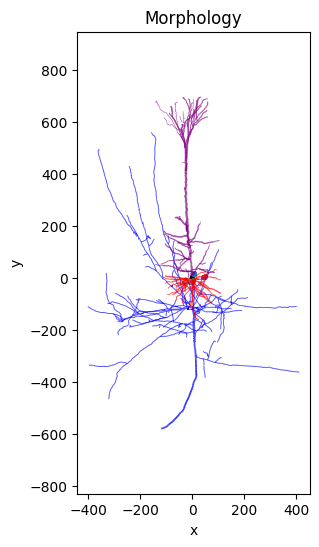

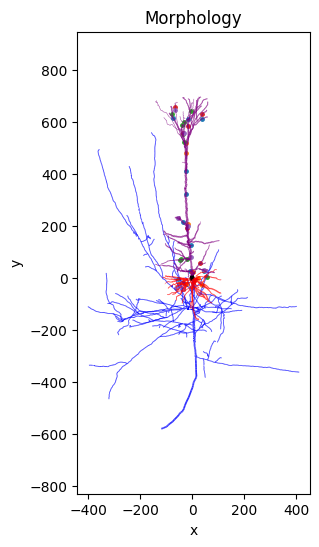

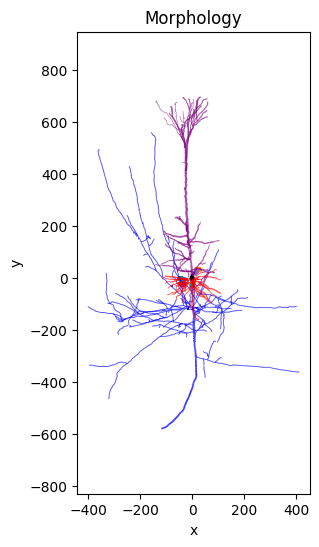

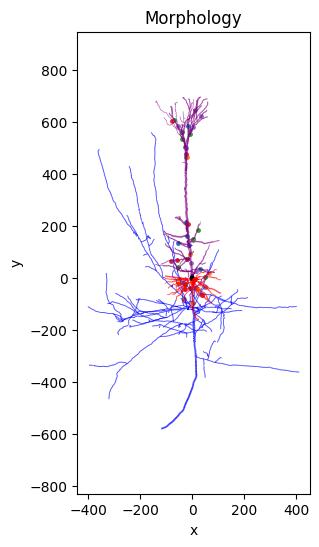

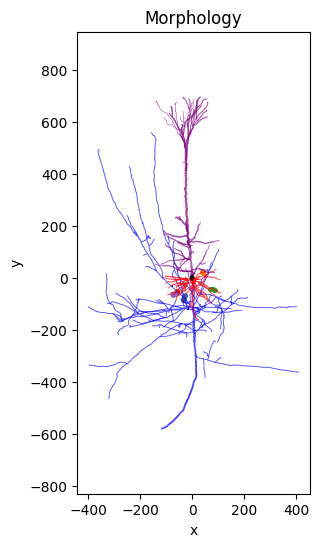

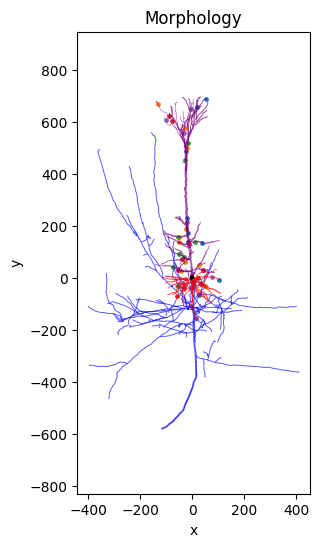

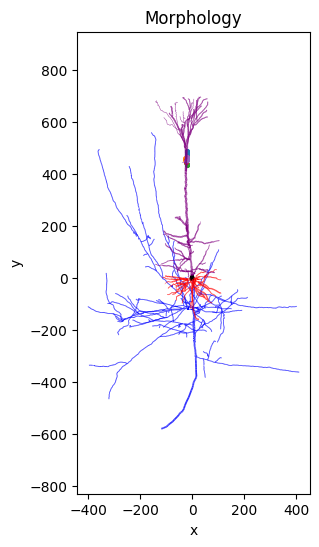

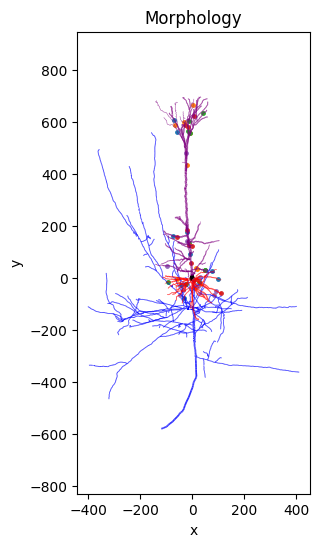

In [2]:
morph_loc_form = obi.MorphologyLocationsForm(
                    initialize=obi.MorphologyLocations.Initialize(
                        morphology=morph_path,
                        n_centers=5,
                        n_per_center=10,
                        srcs_per_center=1,
                        center_pd_mean=[20, 50, 100, 500],
                        center_pd_sd=15.0,
                        max_dist_from_center=[10.0, None],
                        lst_section_types=[[3, 4]]
                    )
)

grid_scan = obi.GridScan(form=morph_loc_form, output_root="output")
grid_scan.execute(processing_method="run")


## Morphology locations blocks

There are several blocks of differing complexity that generate locations.
Here, we demo most of them.

In [ ]:
from morphio import Morphology as MorphioMorphology
m = MorphioMorphology(morph_path)

### RandomMorphologyLocations
Simplest case: Random locations without constraints.

Note that there are no constraints on path distance or anything, really.

In [ ]:
# Default number of locations is 1
tst = obi.RandomMorphologyLocations()
display(tst.points_on(m))

# Can specify a larger number instead.
tst = obi.RandomMorphologyLocations(number_of_locations=10)
display(tst.points_on(m))

# Can also limit the section types.
# Note that the above likely has different section types, this one only shows "2".
tst = obi.RandomMorphologyLocations(number_of_locations=10, section_types=(4, ))
display(tst.points_on(m))

,segment_id,section_id,section_type,segment_offset,path_distance,normalized_section_offset
0,13,169,2,1.717101,447.357938,0.639919


,segment_id,section_id,section_type,segment_offset,path_distance,normalized_section_offset
0,121,126,2,1.900856,571.989530,0.854157
1,39,141,2,1.353891,332.392681,0.852600
2,4,144,2,1.735432,556.837090,0.054285
3,57,168,2,1.581673,361.602878,0.647452
4,13,169,2,0.163442,447.357938,0.639919
5,8,199,3,0.125681,41.593017,0.258579
6,21,222,3,0.059699,37.054228,0.778710
7,6,254,3,1.606591,37.121108,0.099668
8,13,328,4,3.391054,275.199254,0.821467
9,30,358,4,2.823483,126.999160,0.556715


,segment_id,section_id,section_type,segment_offset,path_distance,normalized_section_offset
0,3,304,4,1.932028,553.429249,0.120972
1,1,309,4,1.375812,641.342161,0.032926
2,10,310,4,1.283931,655.756402,0.815279
3,96,319,4,2.945596,740.790337,0.813551
4,108,319,4,0.139708,765.267371,0.939105
5,0,326,4,0.246460,210.808930,0.000000
6,34,332,4,0.031643,239.926013,0.607566
7,35,340,4,1.732307,213.000368,0.784221
8,11,361,4,1.415862,75.361434,0.228948
9,1,371,4,2.568509,4.367881,0.558705


### RandomGroupedMorphologyLocations
This only adds a grouping to the output. That is, an additional column that assigns each location to a conceptual group.

In [13]:
# Default is a single group. This still adds the "source_index" column, but values will be 0.
tst = obi.RandomGroupedMorphologyLocations()
display(tst.points_on(m))

# More customized
tst = obi.RandomGroupedMorphologyLocations(number_of_locations=10, n_groups=2)
display(tst.points_on(m))

,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,13,169,2,1.717101,447.357938,0,0.639919


,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,121,126,2,1.900856,571.989530,0,0.854157
1,39,141,2,1.353891,332.392681,1,0.852600
2,4,144,2,1.735432,556.837090,0,0.054285
3,57,168,2,1.581673,361.602878,1,0.647452
4,13,169,2,0.163442,447.357938,1,0.639919
5,8,199,3,0.125681,41.593017,1,0.258579
6,21,222,3,0.059699,37.054228,1,0.778710
7,6,254,3,1.606591,37.121108,1,0.099668
8,13,328,4,3.391054,275.199254,0,0.821467
9,30,358,4,2.823483,126.999160,1,0.556715


### ClusteredMorphologyLocations
This constrains generated locations such that they are clustered. That means, groups of them will be within a specified maximum distance of each other. Note that this distance is two times the value of the parameter 'cluster_max_distance'.

In [14]:
# Note that many locations will be on the same section and nearby segments.
tst = obi.ClusteredMorphologyLocations(number_of_locations=20, n_clusters=5, cluster_max_distance=5.0)
display(tst.points_on(m))

# Also section type can always be specified.
tst = obi.ClusteredMorphologyLocations(number_of_locations=20, n_clusters=5,
                                       cluster_max_distance=5.0, section_types=(3,))
display(tst.points_on(m))

,reference_loc_index,segment_id,section_id,section_type,segment_offset,path_distance,normalized_section_offset
0,0,32,186,3,0.877714,124.463259,0.922827
1,0,33,186,3,1.919091,126.819746,0.958462
2,0,33,186,3,1.210663,126.819746,0.958462
3,0,34,186,3,0.304689,128.232456,0.992114
4,1,4,266,4,2.455485,185.013322,0.659211
5,1,5,266,4,2.309554,188.104051,0.836373
6,1,5,266,4,2.582179,188.104051,0.836373
7,1,0,329,4,3.207534,191.062594,0.000000
8,2,10,217,3,1.592915,57.489186,0.158271
9,2,11,217,3,0.412682,60.120405,0.182466


,reference_loc_index,segment_id,section_id,section_type,segment_offset,path_distance,normalized_section_offset
0,0,7,224,3,0.603152,57.548093,0.132768
1,0,9,224,3,1.382524,59.220944,0.156088
2,0,11,224,3,0.703051,63.581738,0.204653
3,0,11,224,3,0.755092,63.581738,0.204653
4,1,11,238,3,1.730516,59.183707,0.226096
5,1,11,238,3,2.019573,59.183707,0.226096
6,1,11,238,3,2.201303,59.183707,0.226096
7,1,15,238,3,2.416174,66.774733,0.339280
8,2,0,229,3,1.744547,10.527065,0.000000
9,2,2,229,3,0.196394,14.579744,0.371845


### ClusteredPathDistanceMorphologyLocations
This exposes the full complexity: Several clusters at specific path distances, and several groups per cluster.

In [9]:
tst = obi.ClusteredPathDistanceMorphologyLocations(
    number_of_locations=100,
    n_clusters=5,
    cluster_max_distance=10.0,
    path_dist_mean=100.0,
    path_dist_sd=2.0
)
display(tst.points_on(m))


,reference_loc_index,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,0,40,246,3,1.245280,90.709366,0,0.524390
1,0,40,246,3,0.242063,90.709366,0,0.524390
2,0,40,246,3,2.396422,90.709366,0,0.524390
3,0,42,246,3,0.692876,92.835898,0,0.545095
4,0,47,246,3,0.700187,98.358747,0,0.596748
...,...,...,...,...,...,...,...,...
95,4,36,238,3,0.990326,104.795611,4,0.890393
96,4,36,238,3,1.678552,104.795611,4,0.890393
97,4,38,238,3,0.910579,107.444342,4,0.924708
98,4,38,238,3,0.570457,107.444342,4,0.924708
